# reqired libraries

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# open files and scan data

In [175]:
df_users = pd.read_csv('./datasets/users.csv')
df_tariffs = pd.read_csv('./datasets/tariffs.csv')
df_messages = pd.read_csv('./datasets/messages.csv')
df_internet = pd.read_csv('./datasets/internet.csv')
df_calls = pd.read_csv('./datasets/calls.csv')

In [176]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [177]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [178]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [179]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [180]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


# prepare data

## fix data type

### fix data type: users

In [181]:
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


columns to fix:
- reg_date:     object -> datetime
- churn_date:  object -> datetime

In [182]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], errors='coerce')

In [183]:
df_users['reg_date'].info()
df_users['reg_date'].head()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: reg_date
Non-Null Count  Dtype         
--------------  -----         
500 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.0 KB


0   2018-05-25
1   2018-11-01
2   2018-06-17
3   2018-08-17
4   2018-05-14
Name: reg_date, dtype: datetime64[ns]

In [184]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], errors='coerce')

In [185]:
df_users['churn_date'].info()
df_users['churn_date'].head()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: churn_date
Non-Null Count  Dtype         
--------------  -----         
38 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.0 KB


0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: churn_date, dtype: datetime64[ns]

### fix data type: messages

In [186]:
df_messages.info()
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


columns to fix:
- message_date: object -> datetime

In [187]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], errors='coerce')

In [188]:
df_messages.info()
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


### fix data type: internet

In [189]:
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [190]:
df_internet.tail()

,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


columns to fix:
- first column: drop it
- session_date: object -> datetime

In [191]:
df_internet = df_internet.drop(['Unnamed: 0'], axis=1)

In [192]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], errors='coerce')

In [193]:
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### fix data type: calls

In [194]:
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


columns to fix:
- call_date: object -> datetime

In [195]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], errors='coerce')

In [196]:
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


## fix errors

### fix errors: users

In [197]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [198]:
df_users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [199]:
df_users['reg_date'].describe(datetime_is_numeric=True)

count                              500
mean     2018-06-30 18:57:35.999999744
min                2018-01-01 00:00:00
25%                2018-04-07 12:00:00
50%                2018-07-02 12:00:00
75%                2018-09-29 00:00:00
max                2018-12-31 00:00:00
Name: reg_date, dtype: object

In [200]:
df_users['churn_date'].describe(datetime_is_numeric=True)

count                               38
mean     2018-11-13 00:37:53.684210432
min                2018-08-17 00:00:00
25%                2018-10-14 00:00:00
50%                2018-11-24 00:00:00
75%                2018-12-15 12:00:00
max                2018-12-30 00:00:00
Name: churn_date, dtype: object

there should be only two types of tariff

In [201]:
df_users['tariff'].describe()

count       500
unique        2
top       smart
freq        351
Name: tariff, dtype: object

everything else looks good

### fix errors: tarrifs

In [202]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [203]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


everything else looks good

### fix errors: messages

In [204]:
df_messages.info()
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [205]:
df_messages['message_date'].describe(datetime_is_numeric=True)

count                           123036
mean     2018-09-04 15:28:42.227640576
min                2018-01-02 00:00:00
25%                2018-07-09 00:00:00
50%                2018-09-20 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: message_date, dtype: object

looks good

we can check if first four letters of "id" is equal to the "user_id" in the whole database

In [206]:
def check_id(id, user_id):
  id_int_value = int(id[0:4])
  if (id_int_value == user_id):
    return True
  return False

df_messages['good_id'] = df_messages.apply(lambda row : check_id(row['id'], row['user_id']), axis=1)

should be 123036 "True" values as rows in this table

In [207]:
df_messages['good_id'].value_counts()

True    123036
Name: good_id, dtype: int64

In [208]:
df_messages = df_messages.drop(['good_id'], axis=1)

everything else looks good

### fix errors: internet

In [209]:
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [210]:
df_internet['session_date'].describe(datetime_is_numeric=True)

count                           149396
mean     2018-09-02 12:55:35.221826560
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: session_date, dtype: object

In [211]:
df_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

looks good, no outliers, and max data used just over 1.5 gb (per session)

everything else looks good

### fix errors: calls

In [212]:
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [213]:
df_calls['call_date'].describe(datetime_is_numeric=True)

count                           202607
mean     2018-09-02 20:01:37.583992832
min                2018-01-01 00:00:00
25%                2018-07-05 00:00:00
50%                2018-09-17 00:00:00
75%                2018-11-14 00:00:00
max                2018-12-31 00:00:00
Name: call_date, dtype: object

In [214]:
df_calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

max duration of a call is 38 min. which seems reasonable

In [215]:
df_calls['good_id'] = df_calls.apply(lambda row : check_id(row['id'], row['user_id']), axis=1)

In [216]:
df_calls['good_id'].value_counts()

True    202607
Name: good_id, dtype: int64

same value counts as total rows, which is good

In [217]:
df_calls = df_calls.drop(['good_id'], axis=1)

everything else looks good

## generate data (for each user and each month)

### number of calls

to generate number of calls for each month we first have to create a months table

In [218]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

In [219]:
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


create a new table with 'id', 'user_id', 'month', 'calls_count' <br/>
'id' will be counted

In [220]:
df_calls_count = df_calls[['id', 'user_id', 'month']]

also this is a good time to include plan to this table

In [221]:
user_tariff = {}
def populate_user_tariff(row):
  user_id = row['user_id']
  tariff = row['tariff']
  user_tariff.update({user_id: tariff})

ok = df_users[['user_id', 'tariff']].apply(lambda row : populate_user_tariff(row), axis=1)

In [222]:
def find_tariff(row):
  user_id = row['user_id']
  tariff = user_tariff[user_id]
  return tariff

In [223]:
df_calls_count['tariff'] = df_calls_count.apply(lambda row : find_tariff(row), axis=1)

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_23481/180338334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calls_count['tariff'] = df_calls_count.apply(lambda row : find_tariff(row), axis=1)


In [224]:
df_calls_count.head()

,id,user_id,month,tariff
0,1000_0,1000,7,ultra
1,1000_1,1000,8,ultra
2,1000_2,1000,6,ultra
3,1000_3,1000,9,ultra
4,1000_4,1000,12,ultra


In [225]:
df_calls_count = df_calls_count.groupby(['user_id', 'month']).agg({'id':'count', 'tariff':pd.Series.mode})

In [226]:
df_calls_count = df_calls_count.rename(columns={'id': 'calls'})

In [227]:
df_calls_count.head()

calls tariff
user_id month              
1000    5         22  ultra
        6         43  ultra
        7         47  ultra
        8         52  ultra
        9         58  ultra

looks good!

### minutes

create a new table with 'duration', 'user_id', 'month', 'calls_count' <br/>
'duration' will be counted

In [228]:
df_calls_minutes = df_calls[['duration', 'user_id', 'month']]

remember that call duration needs to round up to a whole minute

In [229]:
def round_up(row):
  duration = row['duration']
  return math.ceil(duration)

In [230]:
df_calls_minutes['duration'] = df_calls_minutes.apply(lambda row : round_up(row), axis=1)

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_23481/4117006191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calls_minutes['duration'] = df_calls_minutes.apply(lambda row : round_up(row), axis=1)


In [231]:
df_calls_minutes = df_calls_minutes.groupby(['user_id', 'month']).sum()

In [232]:
df_calls_minutes.head()

duration
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466

looks good!

### number of messages

to generate a number of messages each month we first have to create a month table

In [233]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

In [234]:
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [235]:
df_messages_count = df_messages[['id', 'user_id', 'month']]

In [236]:
df_messages_count = df_messages_count.groupby(['user_id', 'month']).count()

In [237]:
df_messages_count = df_messages_count.rename(columns={"id" : "messages"})

In [238]:
df_messages_count.head()

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57

looks good!

### internet data used

to generate amount of used internet data each month we first have to create a month table

In [239]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

In [240]:
df_internet_usage = df_internet[['mb_used', 'user_id', 'month']]

In [241]:
df_internet_usage = df_internet_usage.groupby(['user_id', 'month']).sum()

In [242]:
df_internet_usage.head()

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

remember that we will actually use the gb used, and usage rounds up

In [243]:
def round_to_gb(row):
  mb = row['mb_used']
  gb = mb / 1024
  gb = math.ceil(gb)
  return gb

In [244]:
df_internet_usage['gb'] = df_internet_usage.apply(lambda row : round_to_gb(row), axis=1)

In [245]:
df_internet_usage.head()

mb_used  gb
user_id month              
1000    5       2253.49   3
        6      23233.77  23
        7      14003.64  14
        8      14055.93  14
        9      14568.91  15

looks good!

### costs each month

combine data together, and apply a function

#### combine data

In [246]:
dfs = [df_calls_count, df_calls_minutes, df_messages_count, df_internet_usage]

In [265]:
df_costs = pd.concat(dfs, axis=1)

In [266]:
df_costs.head(15)

calls tariff  duration  messages   mb_used    gb
user_id month                                                  
1000    5       22.0  ultra     159.0      22.0   2253.49   3.0
        6       43.0  ultra     172.0      60.0  23233.77  23.0
        7       47.0  ultra     340.0      75.0  14003.64  14.0
        8       52.0  ultra     408.0      81.0  14055.93  14.0
        9       58.0  ultra     466.0      57.0  14568.91  15.0
        10      57.0  ultra     350.0      73.0  14702.49  15.0
        11      43.0  ultra     338.0      58.0  14756.47  15.0
        12      46.0  ultra     333.0      70.0   9817.61  10.0
1001    11      59.0  smart     430.0       NaN  18429.34  18.0
        12      63.0  smart     414.0       NaN  14036.66  14.0
1002    6       15.0  smart     117.0       4.0  10856.82  11.0
        7       26.0  smart     214.0      11.0  17580.10  18.0
        8       42.0  smart     289.0      13.0  20319.26  20.0
        9       36.0  smart     206.0       4.0  16691.08  17.0
        10      33.0  smart     212.0      10.0  13888.25  14.0

looks good!

#### apply a calculating function

In [267]:
def smart_costs(duration, messages, gb):
  # min monthly cost 550
  # included: 500 min, 50 messages, 15 gb
  # extra prices: min = 3, message = 3, gb = 200
  total = 550
  if (duration > 500):
    total += (duration - 500) * 3
  if (messages > 50):
    total += (messages - 50) * 3
  if (gb > 15):
    total += (gb - 15) * 200
  return total

In [268]:
def ultra_costs(duration, messages, gb):
  # min monthly cost 1950
  # included; 3000 min, 1000 messages, 30 gb
  # extra prices: min = 1, message = 1, gb = 150
  total = 1950
  if (duration > 3000):
    total += (duration - 3000)
  if (messages > 1000):
    total += (messages - 1000)
  if (gb > 30):
    total += (gb - 30) * 150
  return total

In [269]:
def calculate_costs(row):
  tariff = row['tariff']
  duration = row['duration']
  messages = row['messages']
  gb = row['gb']
  if (tariff == 'smart'):
    return smart_costs(duration, messages, gb)
  return ultra_costs(duration, messages, gb)

In [270]:
df_costs['costs'] = df_costs.apply(lambda row : calculate_costs(row), axis=1)

In [271]:
df_costs.head(20)

calls tariff  duration  messages   mb_used    gb   costs
user_id month                                                          
1000    5       22.0  ultra     159.0      22.0   2253.49   3.0  1950.0
        6       43.0  ultra     172.0      60.0  23233.77  23.0  1950.0
        7       47.0  ultra     340.0      75.0  14003.64  14.0  1950.0
        8       52.0  ultra     408.0      81.0  14055.93  14.0  1950.0
        9       58.0  ultra     466.0      57.0  14568.91  15.0  1950.0
        10      57.0  ultra     350.0      73.0  14702.49  15.0  1950.0
        11      43.0  ultra     338.0      58.0  14756.47  15.0  1950.0
        12      46.0  ultra     333.0      70.0   9817.61  10.0  1950.0
1001    11      59.0  smart     430.0       NaN  18429.34  18.0  1150.0
        12      63.0  smart     414.0       NaN  14036.66  14.0   550.0
1002    6       15.0  smart     117.0       4.0  10856.82  11.0   550.0
        7       26.0  smart     214.0      11.0  17580.10  18.0  1150.0
        8       42.0  smart     289.0      13.0  20319.26  20.0  1550.0
        9       36.0  smart     206.0       4.0  16691.08  17.0   950.0
        10      33.0  smart     212.0      10.0  13888.25  14.0   550.0
        11      32.0  smart     243.0      16.0  18587.28  19.0  1350.0
        12      33.0  smart     236.0      12.0  18113.73  18.0  1150.0
1003    8       55.0  ultra     380.0      37.0   8565.21   9.0  1950.0
        9      134.0  ultra     961.0      91.0  12468.87  13.0  1950.0
        10     108.0  ultra     855.0      83.0  14768.14  15.0  1950.0

# analyze data

## make database for each tariff

create two tables for tariffs: "smart" and "ultra"

In [272]:
df_smart = df_costs[df_costs['tariff'] == 'smart']

In [273]:
df_smart.head()

calls tariff  duration  messages   mb_used    gb   costs
user_id month                                                          
1001    11      59.0  smart     430.0       NaN  18429.34  18.0  1150.0
        12      63.0  smart     414.0       NaN  14036.66  14.0   550.0
1002    6       15.0  smart     117.0       4.0  10856.82  11.0   550.0
        7       26.0  smart     214.0      11.0  17580.10  18.0  1150.0
        8       42.0  smart     289.0      13.0  20319.26  20.0  1550.0

In [274]:
df_ultra = df_costs[df_costs['tariff'] == 'ultra']

In [275]:
df_ultra.head()

calls tariff  duration  messages   mb_used    gb   costs
user_id month                                                          
1000    5       22.0  ultra     159.0      22.0   2253.49   3.0  1950.0
        6       43.0  ultra     172.0      60.0  23233.77  23.0  1950.0
        7       47.0  ultra     340.0      75.0  14003.64  14.0  1950.0
        8       52.0  ultra     408.0      81.0  14055.93  14.0  1950.0
        9       58.0  ultra     466.0      57.0  14568.91  15.0  1950.0

## analyze mean, dispersion and standard deviation

### duration

In [289]:
df_ultra['duration'].describe()

count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: duration, dtype: float64

In [291]:
df_smart['duration'].describe()

count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: duration, dtype: float64

### messages

In [292]:
df_ultra['messages'].describe()

count    762.000000
mean      61.195538
std       44.716597
min        1.000000
25%       25.000000
50%       52.000000
75%       88.000000
max      224.000000
Name: messages, dtype: float64

In [293]:
df_smart['messages'].describe()

count    1916.000000
mean       38.747390
std        26.817396
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: messages, dtype: float64

### data usage in gb

In [294]:
df_ultra['gb'].describe()

count    941.000000
mean      19.695005
std        9.735407
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb, dtype: float64

In [295]:
df_smart['gb'].describe()

count    2222.000000
mean       16.337084
std         5.743447
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb, dtype: float64

## build histograms and describe the distribution

### duration

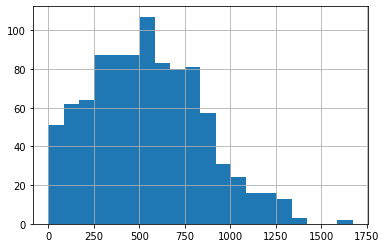

In [300]:
df_ultra['duration'].hist(bins=20)
plt.show()

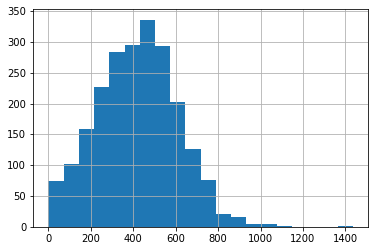

In [301]:
df_smart['duration'].hist(bins=20)
plt.show()

We can see that dispersion on the smart plan is smaller, and we can also see that around 500 minute mark the count drops significantly, which is likely caused by the fact that 500 minutes are included, and everything after requires aditional funds. Both histograms follow the normal distribution.

### messages

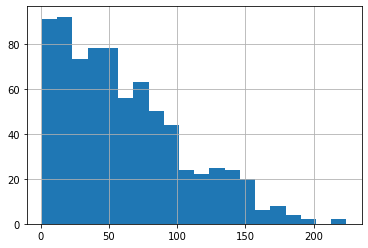

In [302]:
df_ultra['messages'].hist(bins=20)
plt.show()

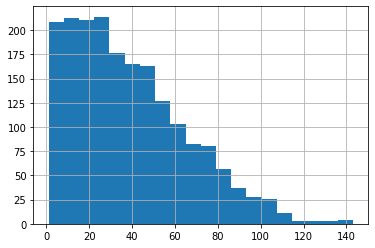

In [303]:
df_smart['messages'].hist(bins=20)
plt.show()

Both graphs seem to follow exponential distribution with a very low rate.

### data usage (gb)

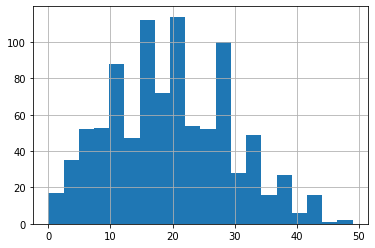

In [304]:
df_ultra['gb'].hist(bins=20)
plt.show()

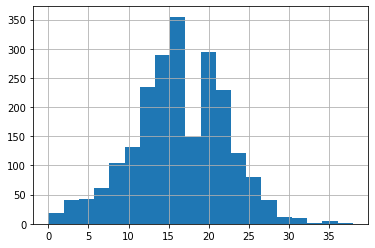

In [305]:
df_smart['gb'].hist(bins=20)
plt.show()

Both histograms follow the normal distribution.

### prices

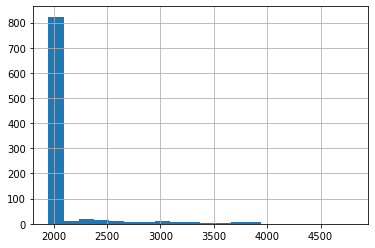

In [307]:
df_ultra['costs'].hist(bins=20)
plt.show()

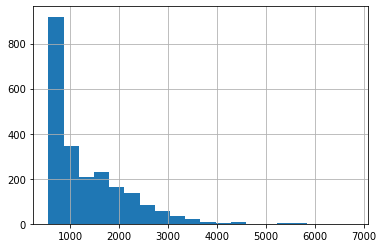

In [308]:
df_smart['costs'].hist(bins=20)
plt.show()

Both historgrams follow the exponential distribution with a very hight rate.

# Test the hypothesis